 # <center> Final_Prediction </center>

#  Import Packages

In [1]:
import joblib as jb
Feature_selection =jb.load('hotel_data/train/model/featureselected_model.pkl')
encode_model =jb.load('hotel_data/train/model/train_encode_model.pkl')
model=jb.load('hotel_data/train/model/tree_clf_model.pkl')

import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

defines a def function called flow that takes two parameters: X_path and y_path.<br>
by following all steps:

In [2]:
def flow (X_path,y_path):
    #read
    X_test=pd.read_csv(X_path)
    y_test=pd.read_csv(y_path)
    y_test=y_test.replace({'not_Cancelled':0,'Cancelled':1})
    
    # encode
    encode_data=encode_model.transform(X_test)
    encode_data = pd.DataFrame(encode_data, columns=encode_model.get_feature_names_out())
    
    # Feature_selection
    featuer_selected=encode_data[Feature_selection]

  
    # predcit
    y_pred=pd.DataFrame(model.predict(featuer_selected))  
    y_pred= y_pred.replace({'Cancelled':1, 'not_Cancelled':0})

    #metrics
    report = classification_report(y_pred, y_test)
    cm=confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,disp

In [3]:
y_pred,report,disp=flow('hotel_data/final_feat.csv','hotel_data/lable.csv')

In [4]:
y_pred

,0
0,0
1,1
2,0
3,1
4,1
...,...
35812,0
35813,1
35814,1
35815,1


In [5]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22578
           1       1.00      1.00      1.00     13239

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



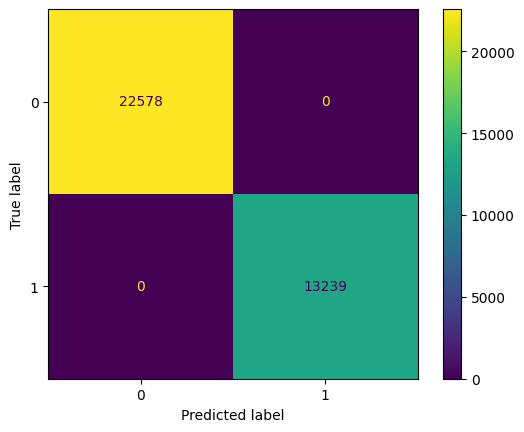

In [6]:
disp.plot()

<div class="alert alert-info">
   In total of 35817 bookings. that are<br>
          NOT CANCELLED = 22578<br>
              CANCELLED = 13239<br>
</div>